### Student Information
Name: 林宜德

Student ID: B11109040(NTUST)

GitHub ID: davenl9i2

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
#setup environment
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
nltk.download("punkt_tab")
from sklearn.utils import Bunch
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap
import helpers.data_mining_helpers as dmh
%load_ext autoreload
%autoreload 2
import sys
print(sys.executable) # c:\<your path to the project directory>\.venv\Scripts\python.exe
print(sys.version) #3.11.0
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\stp09\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\stp09\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


c:\Users\stp09\gg\DM2025Labs\DM2025-Lab1-Exercise\.venv\Scripts\python.exe
3.11.0 (main, Oct 24 2022, 18:26:48) [MSC v.1933 64 bit (AMD64)]


In [300]:
### Begin Assignment Here
#load the new data set as as a sklearn-like Bunch object
dataset = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")
#data preparation
dataset = dataset[['text', 'label']]

categories = {
    -1.0: "negative",
     0.0: "neutral",
     1.0: "positive"
}

reddit_train = Bunch(
    data=dataset['text'].tolist(),    
    target=dataset['label'].tolist(),   
    target_names=list(categories.values())  
)

## exercise1: print out the frist three data
for i in range(3):
    print(f"NO.{i+1} ：")
    print("\n".join(reddit_train.data[i].split("\n")))

#data transformation: convert object into pandas dataframe
X = pd.DataFrame({
    "text": reddit_train.data,
    "label": reddit_train.target
})#create a dataframe with two columns: text and label

label_map = { -1.0: "negative", 0.0: "neutral", 1.0: "positive" }#descriptive representation

X["category"] = X["label"].map(label_map)#add category to the dataframe

NO.1 ：
Calls on retards
NO.2 ：
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
NO.3 ：
Seeing lots of red in the ticker.


In [301]:
## exercise2: some querying techniques

#X[X["category"] == "neutral"].head() #show the first five records where category is neutral

#X.iloc[:10, :2] #show the first ten records and first two columns

X[X["category"].isin(["neutral", "positive"])]#show all records where category is neutral or positive

,text,label,category
1,Stunt as in like why did they even make a big ...,0.0,neutral
2,Seeing lots of red in the ticker.,0.0,neutral
3,Vision Marine Technologies Inc. is rewriting t...,1.0,positive
5,"Hoping to ejaculate in wet warm puss tonight, ...",0.0,neutral
7,Confirmed not a trap. Its been like this for p...,0.0,neutral
...,...,...,...
841,So countries “begging to stop the tariffs” and...,1.0,positive
842,Invest now it is going to shoot up tomorrow,1.0,positive
843,Where can I read this?,0.0,neutral
844,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.0,neutral


In [302]:
## exercise3: fetch record = negative (every 10th record and show frist five)
X[X["category"] == "negative"][::10][0:5]

,text,label,category
0,Calls on retards,-1.0,negative
25,"You see, Target, pissing off a good chunk of y...",-1.0,negative
62,Comedy gold :)),-1.0,negative
95,Japan and the UK are the two largest holders o...,-1.0,negative
125,Trump is like the annoying little brother (wit...,-1.0,negative


In [303]:
#check missing value 
'''
X.isnull().apply(lambda x: dmh.check_missing_values(x))
'''
## exercise4: calculate the missing values in every record
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

In [304]:
#dealing with missing value
'''
X.isnull().apply(lambda x: dmh.check_missing_values(x))#check if there's any missing value
'''
X.dropna(inplace=True)#delete missing value
X.isnull().apply(lambda x: dmh.check_missing_values(x))#checking again

,text,label,category
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [ ]:
# #dealing with duplicate data

len(X)#check how many records(847)
sum(X.duplicated())#check how many duplicate data(23)

'''
X.drop_duplicates(keep='first', inplace=True)#delete duplicate data and keep the first one
X.reset_index(drop=True, inplace=True)#reset the index after deleting duplicate data
'''

#sum(X.duplicated())#check how many duplicate data(0)
len(X)#check how many records(824)

847

<Axes: title={'center': 'Category distribution'}, xlabel='category'>

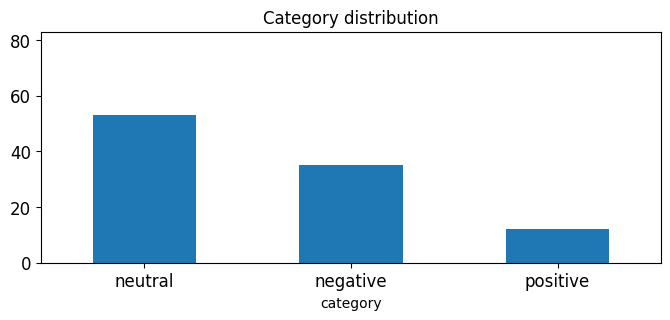

In [306]:
#sampling
X_sample = X.sample(n=100)
## exercise7: plot the category distribution

#print(X.category.value_counts())#check how many records in each category
X_sample.category.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, X_sample.category.value_counts().max()+30],
                                           rot = 0, fontsize = 12, figsize = (8,3))

<Axes: title={'center': 'Category distribution'}, xlabel='category'>

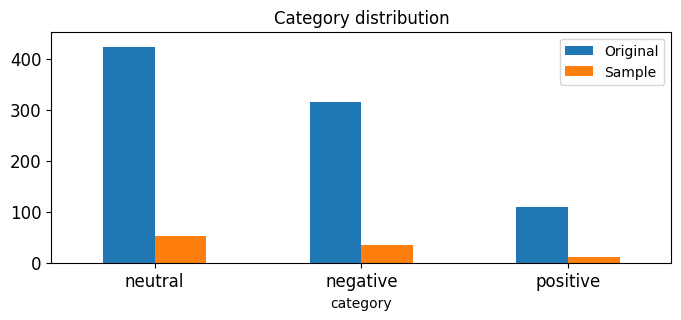

In [307]:
## exercise8: plot the side by side category distribution
x_counts_c = X.category.value_counts()
x_sample_counts = X_sample.category.value_counts()

df_compare = pd.DataFrame({
    'Original': x_counts_c,
    'Sample': x_sample_counts
})

df_compare.plot(kind = 'bar',
   title = 'Category distribution',
   ylim = [0, x_counts_c.max()+30], 
   rot = 0, fontsize = 12, figsize = (8,3))

In [308]:
#feature creation
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))#create unigrams to store words in text each record
list(X[0:1]['unigrams'])#print all the unigrams in the first record

[['Calls', 'on', 'retards']]

In [309]:
#feature subet selection
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [310]:
## exercise9: turn the array[0] text document into a tokenized text using the build_analyzer()
analyze = count_vect.build_analyzer()#create an analyzer
analyze(X.text[0])

['calls', 'on', 'retards']

In [311]:
## exercise10: represent the '1' from vocabulary in the array[1] text document
print(X_counts.shape)#(824, 4346)

print(count_vect.get_feature_names_out()[38:39])#'17th'

print(X_counts[0:5, 500:550].toarray())#check the 500-550 columns in the first five records
indices = X_counts[1, 500:550].nonzero()[1]
print(count_vect.get_feature_names_out()[indices])

(847, 4346)
['17th']
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
['17th']


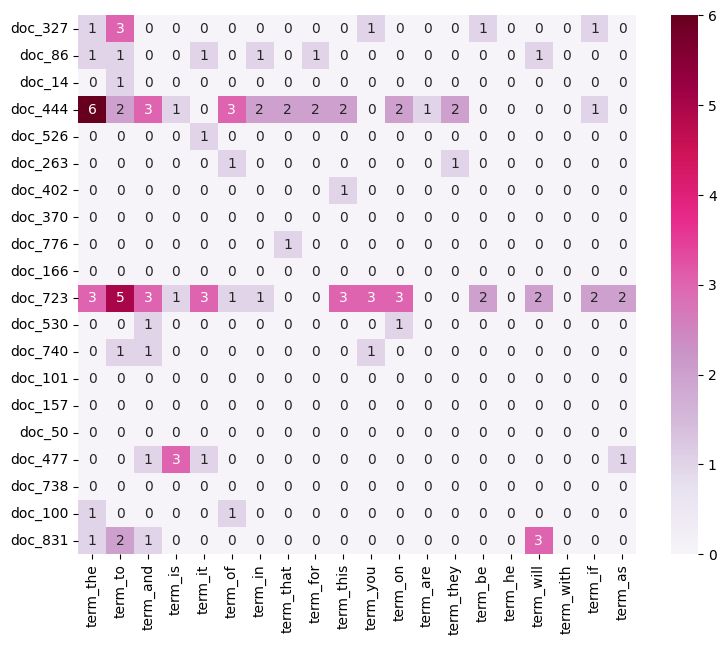

In [312]:
## exercise11: Randomly select 20 documents and plot the frequency of the top 20 terms in these documents

X_sample20 = X.sample(n=20)#randomly select 20 documents

tf_df = pd.DataFrame({
    "term": count_vect.get_feature_names_out(),
    "frequency": np.asarray(X_counts.sum(axis=0)).ravel()
})#create a dataframe to store the term and its frequency
top_terms = tf_df.sort_values("frequency", ascending=False).head(20)#get the top 20 terms with highest frequency

plot_x = ["term_"+str(i) for i in top_terms["term"]]
plot_y = ["doc_"+ str(i) for i in X_sample20.index.tolist()]

plot_z = X_counts[X_sample20.index, :][:, top_terms.index].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=df_todraw.values.max(), annot=True)

In [313]:
## exercise12: use plotly to plot the frequency of the top 300 terms in the whole document
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

fig = px.bar(x=count_vect.get_feature_names_out()[:300], 
              y=term_frequencies[:300],
             labels={'x': 'Term', 'y': 'Frequency'})
fig.show()

In [314]:
## exercise13: reduce the number of terms efficiently
count_vect_ns = CountVectorizer(stop_words='english',min_df=0.01)#filter the stop words and terms that appear in less than 1% of documents
X_counts_ns = count_vect_ns.fit_transform(X.text)

term_freqs = np.asarray(X_counts_ns.sum(axis=0)).ravel()

tf_df = pd.DataFrame({
    "term": count_vect_ns.get_feature_names_out(),
    "frequency": np.asarray(X_counts_ns.sum(axis=0)).ravel()
})


fig = px.bar(x=tf_df["term"][:300], 
              y=tf_df["frequency"][:300],
             labels={'x': 'Term', 'y': 'Frequency'})
fig.show()

In [315]:
## exercise14:
count_vect_ns = CountVectorizer(stop_words='english')#filter the stop words
X_counts_ns = count_vect_ns.fit_transform(X.text)

term_freqs = np.asarray(X_counts_ns.sum(axis=0)).ravel()

tf_df = pd.DataFrame({
    "term": count_vect_ns.get_feature_names_out(),
    "frequency": np.asarray(X_counts_ns.sum(axis=0)).ravel()
})
df_sorted = tf_df.sort_values("frequency", ascending=False)

fig = px.bar(x=df_sorted["term"][:300], 
              y=df_sorted["frequency"][:300],
             labels={'x': 'Term', 'y': 'Frequency'})
fig.show()


C:\Users\stp09\AppData\Local\Temp\ipykernel_24152\4078351355.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



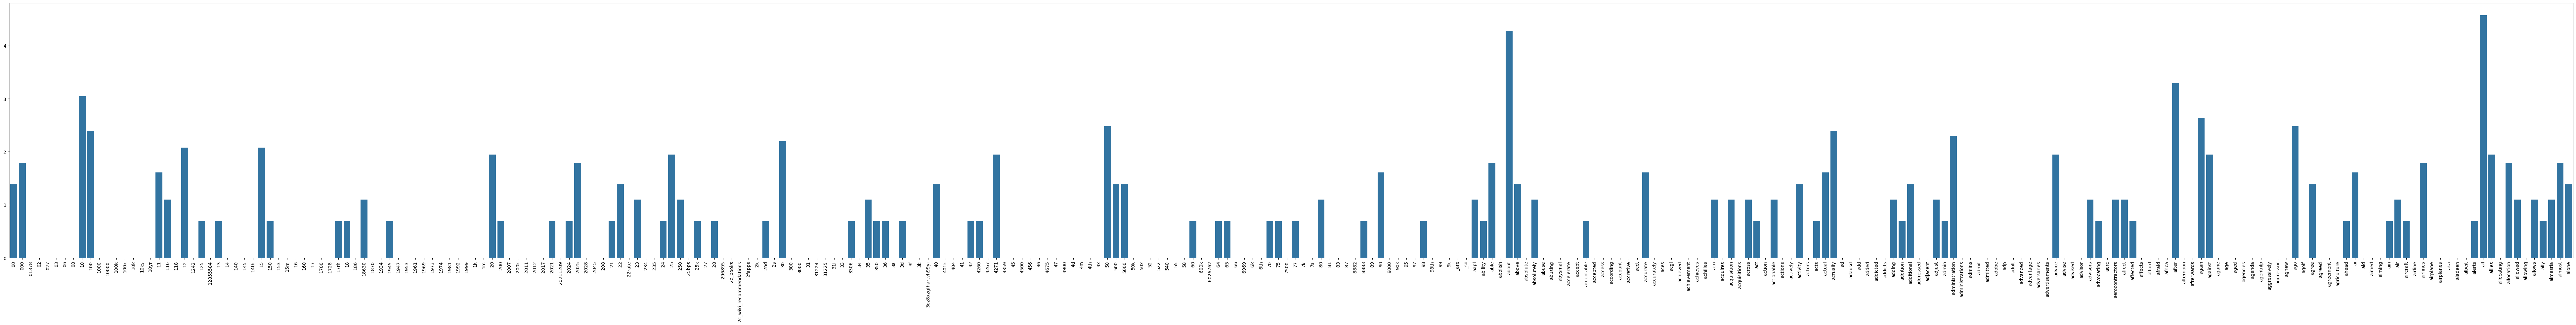

In [316]:
#log version
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

# Phase 2

In [7]:
##setup for phase 2

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import Bunch
import helpers.data_mining_helpers as dmh
import numpy as np
import matplotlib.pyplot as plt
from PAMI.extras.convert.DF2DB import DF2DB
import os
#load the new data set as as a sklearn-like Bunch object
dataset = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")
#data preparation
dataset = dataset[['text', 'label']]

categories = {
    -1.0: "negative",
     0.0: "neutral",
     1.0: "positive"
}

reddit_train = Bunch(
    data=dataset['text'].tolist(),    
    target=dataset['label'].tolist(),   
    target_names=list(categories.values())  
)

#data transformation: convert object into pandas dataframe
X = pd.DataFrame({
    "text": reddit_train.data,
    "label": reddit_train.target
})#create a dataframe with two columns: text and label

label_map = { -1.0: "negative", 0.0: "neutral", 1.0: "positive" }#descriptive representation

X["category"] = X["label"].map(label_map)#add category to the dataframe


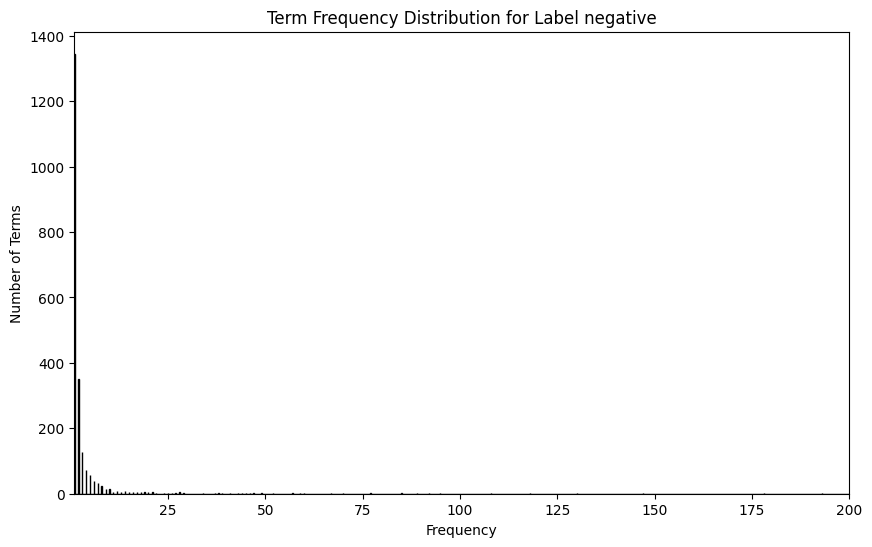

In [8]:
### Begin Assignment Here

## Modify the document-term matrix

categories = X['category'].unique()
category_dfs = {}  # Dictionary to store DataFrames for each category 

for category in categories: 
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['category'] == category].copy()#.copy() 產生一個新的 DataFrame

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

# Sum over all documents to get total frequency for each word
category_number=0
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()#axis=0縱向

# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Label {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [9]:
## (About Exercise 16)Remove the bottom 1% and top 5% words

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

In [10]:
## Transfer into transaction data

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    try:
        # Create the DenseFormatDF object and convert to a transactional database
        obj = DF2DB(term_document_dfs[category])           
        obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)
    except UnicodeEncodeError:
        # Fallback: manually create the transactional database with proper encoding
        print(f"Unicode error for {category}, creating file manually with UTF-8 encoding...")
        
        # Get the dataframe for this category
        df = term_document_dfs[category]
        
        # Create transactions manually
        transactions = []
        for index, row in df.iterrows():
            # Get items where value >= 1
            items = [col for col, val in row.items() if val >= 1]
            if items:  # Only add non-empty transactions
                transactions.append('\t'.join(items))
        
        # Write to file with UTF-8 encoding
        with open(f'td_freq_db_{category_safe}.csv', 'w', encoding='utf-8', newline='') as f:
            for transaction in transactions:
                f.write(transaction + '\n')
        
        print(f"Successfully created td_freq_db_{category_safe}.csv with {len(transactions)} transactions")

Unicode error for positive, creating file manually with UTF-8 encoding...
Successfully created td_freq_db_positive.csv with 108 transactions


Database size (total no of transactions) : 315
Number of items : 2062
Minimum Transaction Size : 1
Average Transaction Size : 11.82857142857143
Maximum Transaction Size : 139
Standard Deviation Transaction Size : 13.325085884608757
Variance in Transaction Sizes : 178.1233848953594
Sparsity : 0.9942635444090342


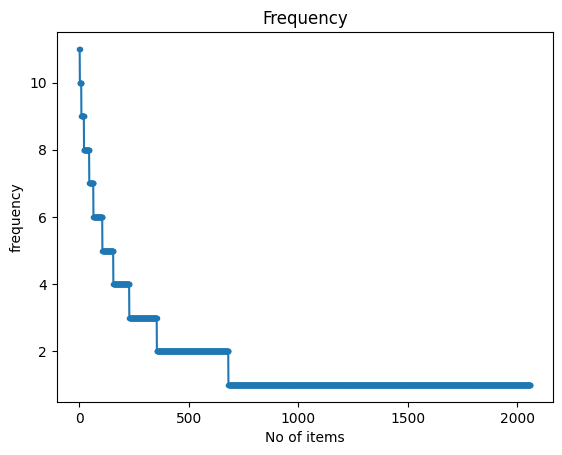

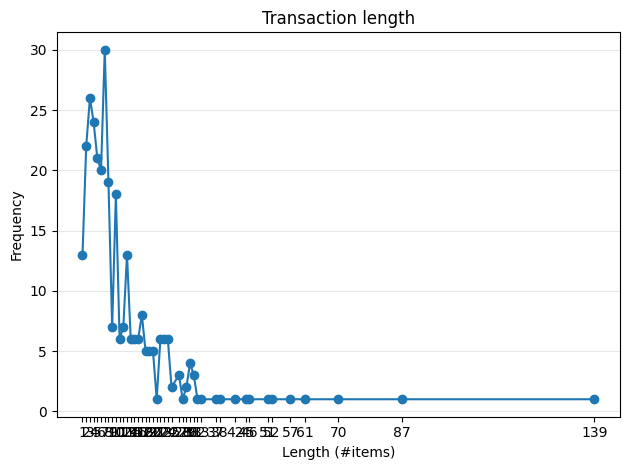

In [11]:
## Observing Item Frequency & Tranx length distribution

from PAMI.extras.dbStats import TransactionalDatabase as tds

#obj = tds.TransactionalDatabase('td_freq_db_positive.csv')
#obj = tds.TransactionalDatabase('td_freq_db_neutral.csv')
obj = tds.TransactionalDatabase('td_freq_db_negative.csv')

obj.run()
obj.printStats()
obj.plotGraphs()

In [12]:
## Setting minSup=5

from PAMI.frequentPattern.basic import FPGrowth as alg

minSup=5
obj1 = alg.FPGrowth(iFile='td_freq_db_negative.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_negative= obj1.getPatternsAsDataFrame()

obj2 = alg.FPGrowth(iFile='td_freq_db_neutral.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_neutral = obj2.getPatternsAsDataFrame()

obj3 = alg.FPGrowth(iFile='td_freq_db_positive.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_positive = obj3.getPatternsAsDataFrame()

print(f"Negative patterns: {len(frequentPatternsDF_negative)}")
print(f"Neutral patterns: {len(frequentPatternsDF_neutral)}")
print(f"Positive patterns: {len(frequentPatternsDF_positive)}")

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Negative patterns: 155
Neutral patterns: 2214
Positive patterns: 19


In [13]:
## Filter the unique patterns from tranx data

# We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_negative, frequentPatternsDF_neutral, frequentPatternsDF_positive]

# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}

# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)

# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)

# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

       Patterns  Support
101       after       11
96         here       10
97          day       10
98         sure       10
99       should       10
..          ...      ...
17     congress        5
18   completely        5
19         sort        5
20        which        5
1         maybe        5

[2278 rows x 2 columns]
Number of patterns discarded: 110


In [14]:
## Generate 'augmented_df'

# Use the same filtered vocabulary as pattern mining
all_terms = set()
for category_df in term_document_dfs.values():
    all_terms.update(category_df.columns)

# Build TDM with filtered vocabulary
count_vect_filtered = CountVectorizer(vocabulary=list(all_terms))
X_tdm_filtered = count_vect_filtered.fit_transform(X['text'])
terms_filtered = count_vect_filtered.get_feature_names_out()

# Lowercase tokenization (consistent with CountVectorizer)
X['tokenized_text'] = X['text'].str.lower().str.split().apply(set)

# Initialize pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Split patterns by TAB and match them
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(word.lower() for word in pattern.split('\t'))
    pattern_matrix[pattern] = X['tokenized_text'].apply(
        lambda x: 1 if pattern_words.issubset(x) else 0
    )

# Use filtered TDM
tdm_df = pd.DataFrame(X_tdm_filtered.toarray(), columns=terms_filtered, index=X.index)

# Concatenate TDM and pattern features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

print(f"Original features (filtered): {tdm_df.shape[1]}")
print(f"Pattern features: {pattern_matrix.shape[1]}")
print(f"Total augmented features: {augmented_df.shape[1]}")
print(f"\nPattern activation count: {pattern_matrix.sum().sum()}")

Original features (filtered): 4254
Pattern features: 2278
Total augmented features: 6532

Pattern activation count: 2417


In [15]:
### Excercise 17: try different values for FAE Top-K, MaxFPGrowth and FPGrowth algorithm in label -1.0 (negative)

##1 FAE Top-K (Excercise 17)
from PAMI.frequentPattern.topk import FAE as alg

seperator = '\t'

k = 200

obj = alg.FAE('td_freq_db_negative.csv', k=k, sep=seperator)
obj.mine()

print(f"\nResults for k={k}:")
print(f"   Total patterns found: {len(obj.getPatterns())}")
print('Runtime: ' + str(obj.getRuntime())) 

patterns_df = obj.getPatternsAsDataFrame()

obj.save(f'fae_patterns_k{k}.txt')
patterns_df

 TopK frequent patterns were successfully generated using FAE algorithm.

Results for k=200:
   Total patterns found: 200
Runtime: 0.00650334358215332


,Patterns,Support
0,already,11
1,after,11
2,things,10
3,here,10
4,day,10
...,...,...
195,due,4
196,fucked,4
197,stuff,4
198,understand,4


In [16]:
##2 MaxFPGrowth and FPGrowth (Excercise 17)

from PAMI.frequentPattern.maximal import MaxFPGrowth  as alg #import the algorithm

#specify the file name
inputFile = 'td_freq_db_negative.csv'
minimumSupportCount = 5

obj = alg.MaxFPGrowth(iFile=inputFile, minSup=minimumSupportCount, sep='\t') #initialize
obj.mine()            #start the mining process

frequentPatternsDF= obj.getPatternsAsDataFrame() #get the generated frequent patterns as a dataframe
print('Total No of patterns: ' + str(len(frequentPatternsDF))) #print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) #measure the runtime

frequentPatternsDF

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 155
Runtime: 0.0040149688720703125


,Patterns,Support
0,media,5
1,selling,5
2,pretty,5
3,enough,5
4,won,5
...,...,...
150,day,10
151,here,10
152,things,10
153,after,11


In [17]:
##3 FPGrowth (Excercise 17)

from PAMI.frequentPattern.basic import FPGrowth as alg

minSup=5

obj = alg.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
obj.mine()
frequentPatternsDF_negative= obj.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_negative))) #print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) #measure the runtime

frequentPatternsDF_negative

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 2593782
Runtime: 1.4513261318206787


,Patterns,Support
0,converting,5
1,divine,5
2,mesh,5
3,mesh\tbody,5
4,smaller,5
...,...,...
2593777,life,24
2593778,ideas,24
2593779,feel,24
2593780,tried,24


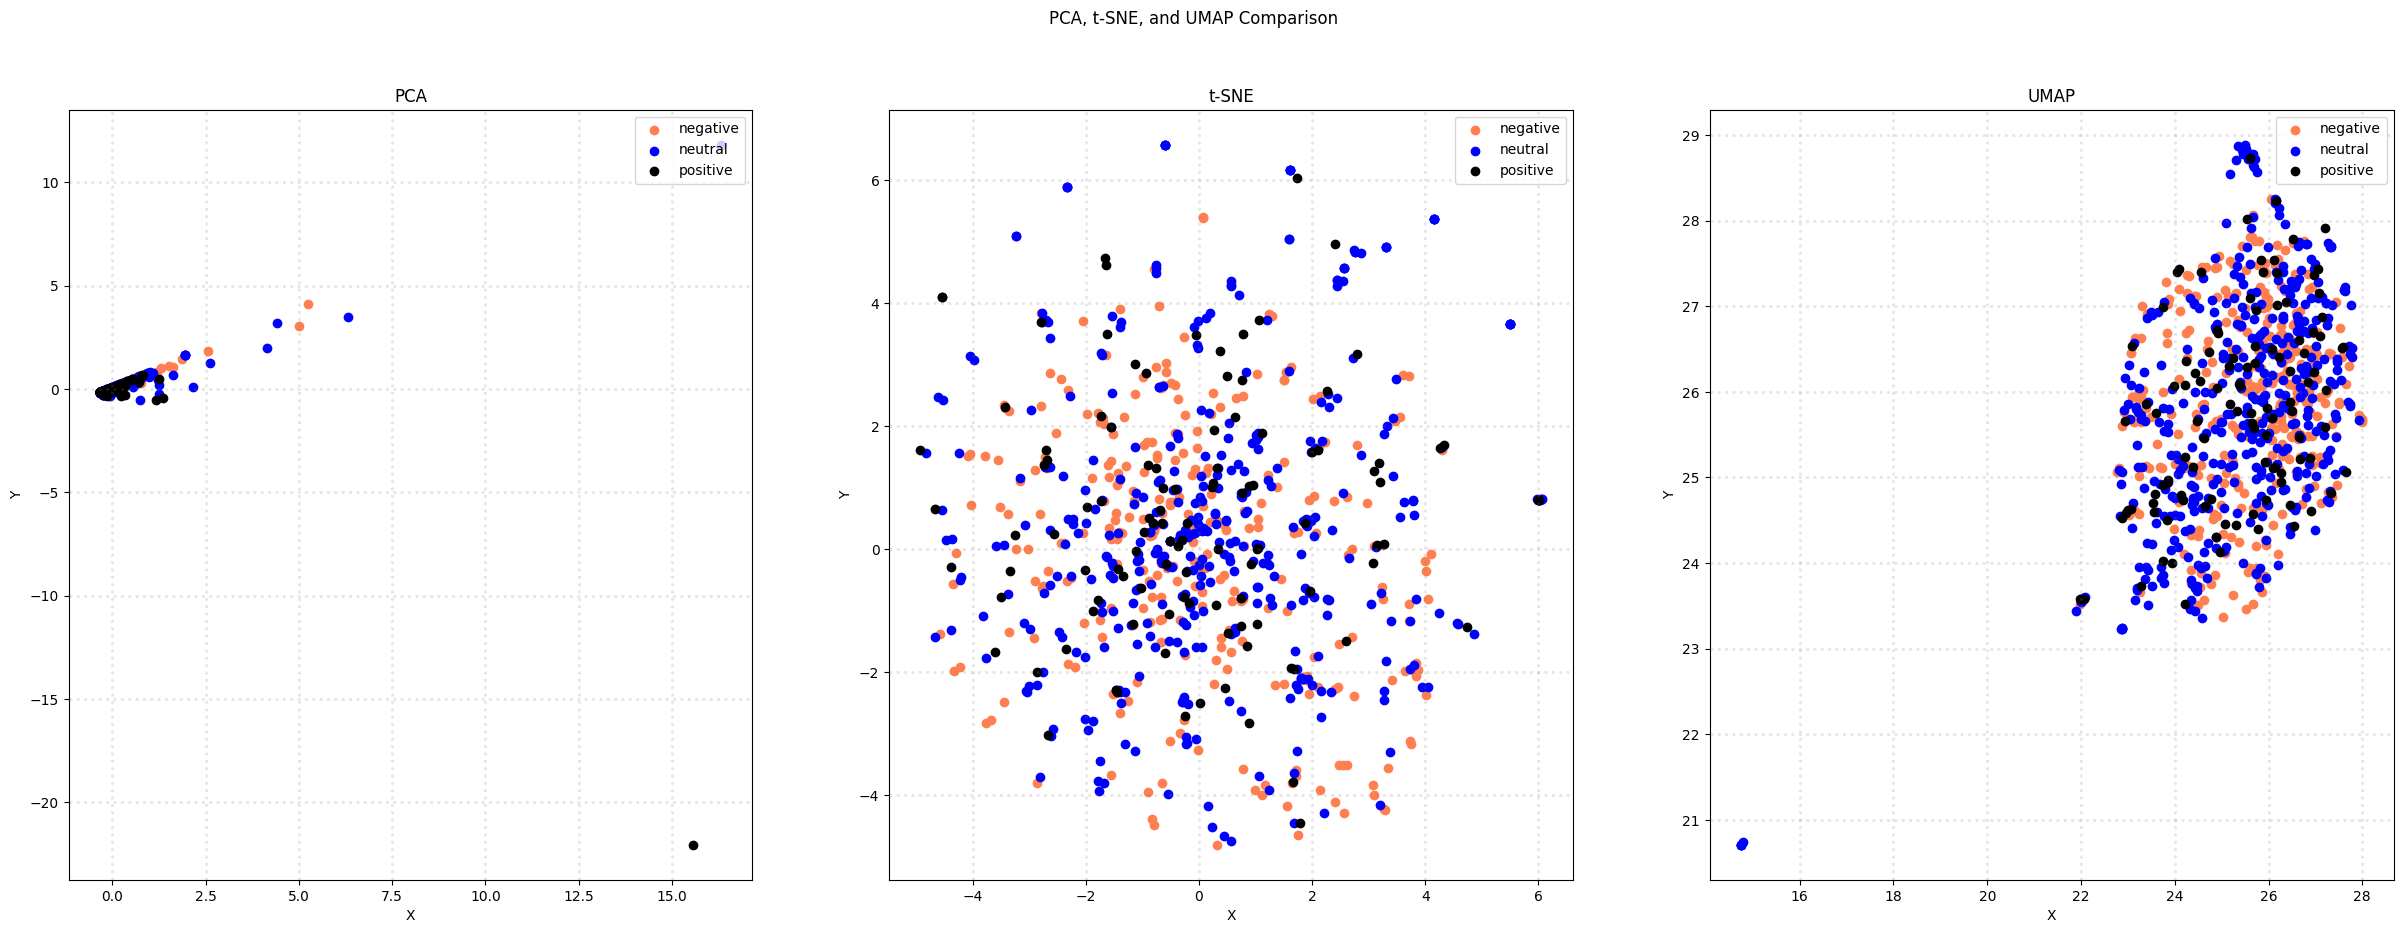

In [19]:
# Plot the results with PCA, t-SNE and UMAP algorithm in subplots

# Apply PCA, t-SNE, and UMAP to the data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

# Plot the results in subplots
col = ['coral', 'blue', 'black']
categories_list = X['category'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories_list):
        xs = X_reduced[X['category'] == category].T[0]
        ys = X_reduced[X['category'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

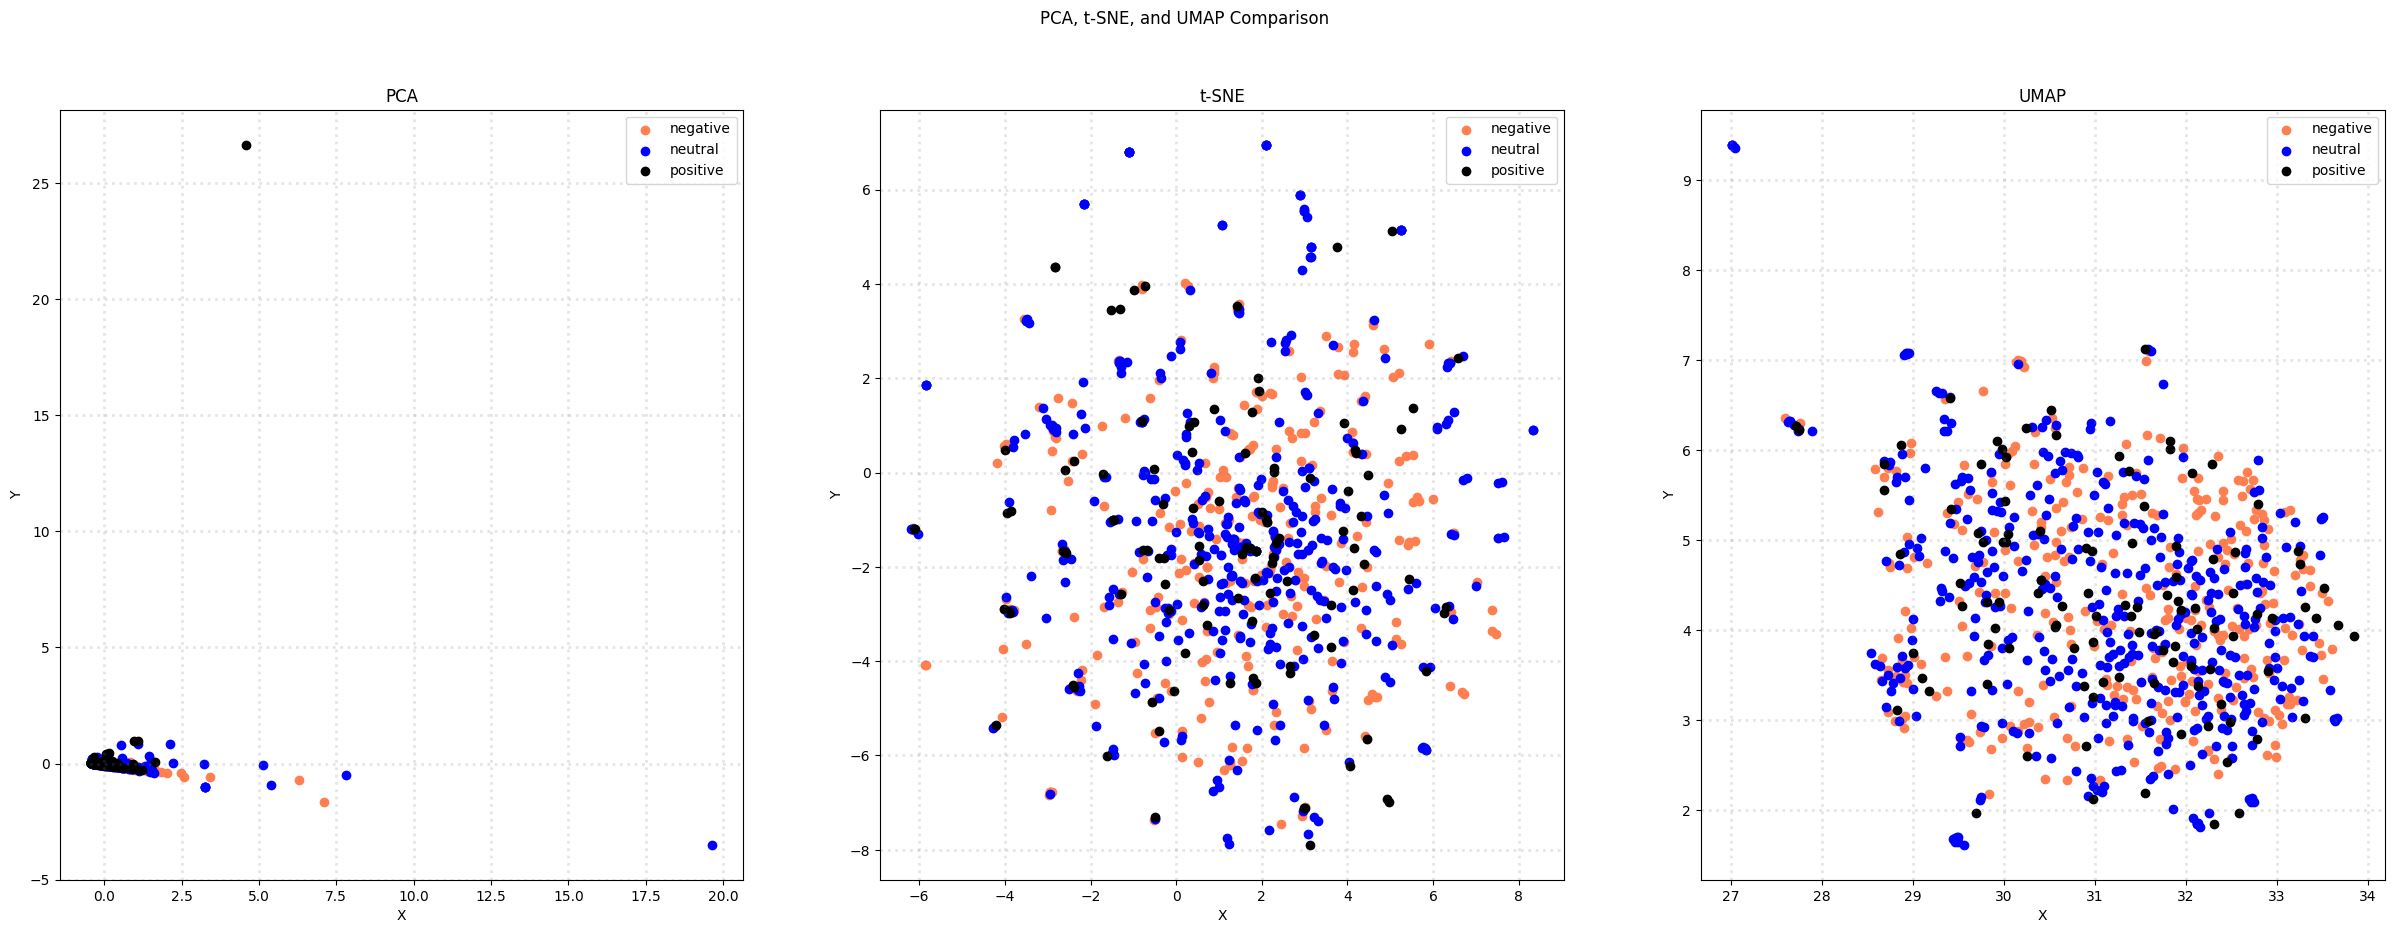

In [20]:
## Plot the augmented data

# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

# Plot the results in subplots
col = ['coral', 'blue', 'black']
categories = X['category'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category'] == category].T[0]
        ys = X_reduced[X['category'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

c:\Users\stp09\gg\DM2025Labs\DM2025-Lab1-Exercise\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


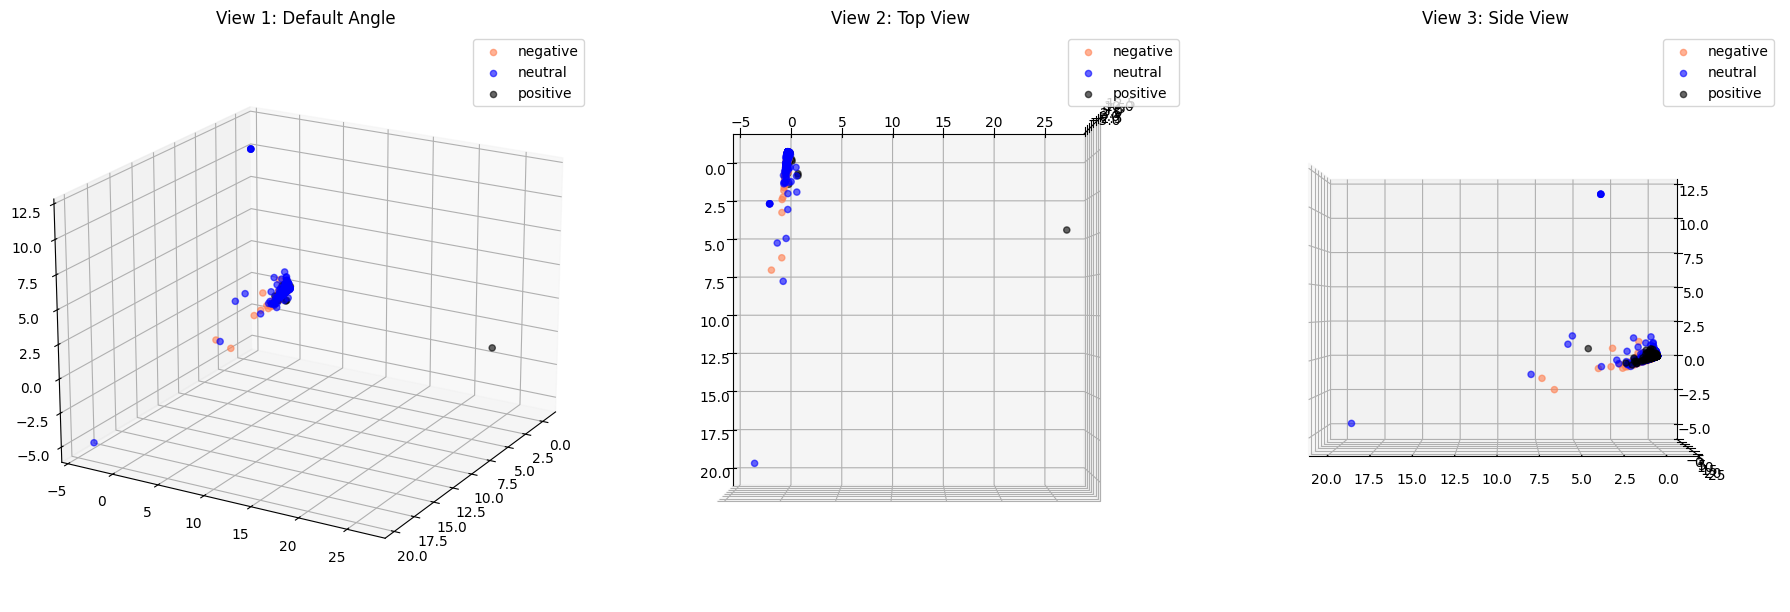

In [21]:
### Excercise 18: plot in 3D

'''
PCA may not a ideal method for this kind of dataset, but can still see the blue and black clusters.
t-SNE and UMAP obviously are better in text dataset.
 I think UMAP are the best, It's easier to identify different colors by changing the angle.
'''

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Dimensionality reduction to 3D
X_pca_3d = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_3d = TSNE(n_components=3, random_state=42).fit_transform(augmented_df.values)
X_umap_3d = umap.UMAP(n_components=3, random_state=42).fit_transform(augmented_df.values)

# Color mapping for categories
col = ['coral', 'blue', 'black']
categories = X['category'].unique()

# Create 3 subplots with different viewing angles
fig = plt.figure(figsize=(18, 6))

target_3d = X_pca_3d

# View 1: Default angle
ax1 = fig.add_subplot(131, projection='3d')
for c, category in zip(col, categories):
    mask = X['category'] == category
    ax1.scatter(target_3d[mask, 0], target_3d[mask, 1], target_3d[mask, 2], 
                c=c, marker='o', label=category, alpha=0.6)
ax1.view_init(elev=20, azim=30)  # Elevation 20°, azimuth 30°
ax1.set_title('View 1: Default Angle')
ax1.legend()

# View 2: Top-down view
ax2 = fig.add_subplot(132, projection='3d')
for c, category in zip(col, categories):
    mask = X['category'] == category
    ax2.scatter(target_3d[mask, 0], target_3d[mask, 1], target_3d[mask, 2], 
                c=c, marker='o', label=category, alpha=0.6)
ax2.view_init(elev=90, azim=0)  # View from directly above
ax2.set_title('View 2: Top View')
ax2.legend()

# View 3: Side view
ax3 = fig.add_subplot(133, projection='3d')
for c, category in zip(col, categories):
    mask = X['category'] == category
    ax3.scatter(target_3d[mask, 0], target_3d[mask, 1], target_3d[mask, 2], 
                c=c, marker='o', label=category, alpha=0.6)
ax3.view_init(elev=0, azim=90)  # Horizontal view
ax3.set_title('View 3: Side View')
ax3.legend()

plt.tight_layout()
plt.show()

In [22]:
## Binarize the 'category'(label) column

from sklearn import preprocessing

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)

X['bin_category'] = mlb.transform(X['category']).tolist()

X[0:9]

,text,label,category,tokenized_text,bin_category
0,Calls on retards,-1.0,negative,"{on, retards, calls}","[1, 0, 0]"
1,Stunt as in like why did they even make a big ...,0.0,neutral,"{why, ever., as, ever, first, politics, stunt,...","[0, 1, 0]"
2,Seeing lots of red in the ticker.,0.0,neutral,"{ticker., in, the, lots, of, red, seeing}","[0, 1, 0]"
3,Vision Marine Technologies Inc. is rewriting t...,1.0,positive,"{partners, collaboration, contribute, pioneeri...","[0, 0, 1]"
4,He didn’t say thank you.,-1.0,negative,"{say, thank, he, you., didn’t}","[1, 0, 0]"
5,"Hoping to ejaculate in wet warm puss tonight, ...",0.0,neutral,"{me, tonight,, in, puss, wish, hoping, warm, l...","[0, 1, 0]"
6,Trump will respond to china increasing their t...,-1.0,negative,"{all, few, fired,, down, lot, i, brutal...., j...","[1, 0, 0]"
7,Confirmed not a trap. Its been like this for p...,0.0,neutral,"{this, its, been, let, we, for, mouth, not, mo...","[0, 1, 0]"
8,Am I the only one seeing the cup & handle brea...,1.0,positive,"{line, technicals, trend, i, was, base, high?,...","[0, 0, 1]"


In [23]:
### exercise 19: generate the binarizaed label column

mlb_l = preprocessing.LabelBinarizer()
mlb_l.fit(X.label)

X['bin_label'] = mlb_l.transform(X['label']).tolist()
X[0:9]

,text,label,category,tokenized_text,bin_category,bin_label
0,Calls on retards,-1.0,negative,"{on, retards, calls}","[1, 0, 0]","[1, 0, 0]"
1,Stunt as in like why did they even make a big ...,0.0,neutral,"{why, ever., as, ever, first, politics, stunt,...","[0, 1, 0]","[0, 1, 0]"
2,Seeing lots of red in the ticker.,0.0,neutral,"{ticker., in, the, lots, of, red, seeing}","[0, 1, 0]","[0, 1, 0]"
3,Vision Marine Technologies Inc. is rewriting t...,1.0,positive,"{partners, collaboration, contribute, pioneeri...","[0, 0, 1]","[0, 0, 1]"
4,He didn’t say thank you.,-1.0,negative,"{say, thank, he, you., didn’t}","[1, 0, 0]","[1, 0, 0]"
5,"Hoping to ejaculate in wet warm puss tonight, ...",0.0,neutral,"{me, tonight,, in, puss, wish, hoping, warm, l...","[0, 1, 0]","[0, 1, 0]"
6,Trump will respond to china increasing their t...,-1.0,negative,"{all, few, fired,, down, lot, i, brutal...., j...","[1, 0, 0]","[1, 0, 0]"
7,Confirmed not a trap. Its been like this for p...,0.0,neutral,"{this, its, been, let, we, for, mouth, not, mo...","[0, 1, 0]","[0, 1, 0]"
8,Am I the only one seeing the cup & handle brea...,1.0,positive,"{line, technicals, trend, i, was, base, high?,...","[0, 0, 1]","[0, 0, 1]"


In [25]:
### Exercise 20: observe the Cosine Similarity results

from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity

# Create and fit the CountVectorizer on the entire dataset
count_vect = CountVectorizer()
count_vect.fit(X['text'])

document_to_tf1 = []
document_to_tf2 = []
document_to_tf3 = []

document_to_tf1.append(X.iloc[8]['text'])
document_to_tf2.append(X.iloc[9]['text'])
document_to_tf3.append(X.iloc[10]['text'])

document_vc1 = count_vect.transform(document_to_tf1)
document_vc2 = count_vect.transform(document_to_tf2)
document_vc3 = count_vect.transform(document_to_tf3)

In [26]:
## Train the Naive Bayes classifier

#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['label', 'category']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['label'], test_size=0.3, random_state=42)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.596078431372549

Classification Report:
               precision    recall  f1-score   support

    negative     0.5932    0.7143    0.6481        98
     neutral     0.6423    0.6529    0.6475       121
    positive     0.2143    0.0833    0.1200        36

    accuracy                         0.5961       255
   macro avg     0.4833    0.4835    0.4719       255
weighted avg     0.5630    0.5961    0.5733       255



In [27]:
### Excercise 21: Train the Naive Bayes classifier with augmented data

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(augmented_df, X['label'], test_size=0.3, random_state=42)

nb_classifier_a = MultinomialNB()
nb_classifier_a.fit(X_train_a, y_train_a)

# Make predictions on the test set
y_pred_a = nb_classifier_a.predict(X_test_a)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test_a, y_pred_a))
print("\nClassification Report:\n", classification_report(y_test_a, y_pred_a, target_names=target_names, digits=4))

Accuracy: 0.6078431372549019

Classification Report:
               precision    recall  f1-score   support

    negative     0.5966    0.7245    0.6544        98
     neutral     0.6434    0.6860    0.6640       121
    positive     0.1429    0.0278    0.0465        36

    accuracy                         0.6078       255
   macro avg     0.4610    0.4794    0.4550       255
weighted avg     0.5548    0.6078    0.5731       255



In [ ]:
## Decision Tree Classifier 

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['label'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.4627450980392157

Classification Report:
               precision    recall  f1-score   support

    negative     0.4483    0.3980    0.4216        98
     neutral     0.5000    0.6446    0.5632       121
    positive     0.0833    0.0278    0.0417        36

    accuracy                         0.4627       255
   macro avg     0.3439    0.3568    0.3422       255
weighted avg     0.4213    0.4627    0.4352       255



In [31]:
## Excercise 24: Decision Tree Classifier with augmented data

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(augmented_df, X['label'], test_size=0.3, random_state=42)

dt_classifier_a = DecisionTreeClassifier(random_state=42)
dt_classifier_a.fit(X_train_a, y_train_a)

y_pred_a = dt_classifier_a.predict(X_test_a)
print("Decision Tree Accuracy (Augmented):", accuracy_score(y_test_a, y_pred_a))
print("\nClassification Report:\n", classification_report(y_test_a, y_pred_a, target_names=target_names, digits=4))

Decision Tree Accuracy (Augmented): 0.4980392156862745

Classification Report:
               precision    recall  f1-score   support

    negative     0.5222    0.4796    0.5000        98
     neutral     0.5099    0.6364    0.5662       121
    positive     0.2143    0.0833    0.1200        36

    accuracy                         0.4980       255
   macro avg     0.4155    0.3998    0.3954       255
weighted avg     0.4729    0.4980    0.4778       255



In [ ]:
##Each dataset can be handled differently as well. What are those inefficent parts you noticed? 
'''
1. For some dataset like homework one, when getting rid of the top 5% or bottom 1% words, it may remove some important words that can help classify the text because of the size of the text.
2. In case like 'Negative'(-1.0) label, the number of records is much less than other categories, which may lead to class imbalance not addressed.
3. The minsup number for frequent pattern mining is crucial, it may cause misunderstanding of the dataset if not set properly.
'''
## How can you improve the Data preprocessing for these specific datasets?
'''
1. Use domain knowledge to identify and retain important words that may be removed during preprocessing.
2. Apply techniques such as oversampling or SMOTE to address class imbalance in the dataset.
3. Evaluate properly with the visualization, and try more times and visualize the results to find the best minsup value. Get better result to enhance the original patterns.
'''